In [1]:
# Zemberek'i kullanabillmek için ilk önce java kütüphenelerini kullanmamızı sağlayan kütüphaneyi ekleyelim
import jpype
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM, java

In [2]:
# Zembrek'in jar dosyalarını okuyalım ve hangi modüller var bakalım
from zipfile import *
import zipfile

def read_jar(jar_file):
    zf = zipfile.ZipFile(jar_file, 'r')
    try:
        lst = zf.infolist()
        for zi in lst:
            fn = zi.filename 
    finally:
        zf.close()
        
read_jar("zemberek-full.jar")

In [3]:
# Zembrek'i çalıştıralım
jar = r"C:/Users/Dilemre/Documents/GitHub/bitirme/zemberek-full.jar" # Zemberek'in yolu
jvmpath = r"C:/Program Files/Java/jdk-17.0.2/bin/server/jvm.dll" # JVM'in yolu
if not jpype.isJVMStarted():
    jpype.startJVM(jvmpath=jvmpath, classpath=jar)
    print("ok")

ok


In [4]:
# Zemberekten gerekili kütüphaneleri import edelim
try:
    TurkishTokenizer = JClass('zemberek.tokenization.TurkishTokenizer')
    Token = JClass('zemberek.tokenization.Token')
    TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
    TurkishSpellChecker = JClass('zemberek.normalization.TurkishSpellChecker')
    WordAnalysis =  JClass('zemberek.morphology.analysis.WordAnalysis')
    TurkishSentenceExtractor = JClass('zemberek.tokenization.TurkishSentenceExtractor')
except:
    print("wrong path")

In [5]:
morphology = TurkishMorphology.createWithDefaults()
tokenizer = TurkishTokenizer.ALL
spell_checker = TurkishSpellChecker(morphology)
extractor = TurkishSentenceExtractor.DEFAULT

In [6]:
#Verilerimizi almak ve işlemek için gerekli kütüphaneler
import pandas as pd
import numpy as np
import string

pd.set_option('display.max_rows', None)

In [7]:
stopwords = [x.strip() for x in open('stop-words.txt','r', encoding="UTF8").read().split('\n')]
df = pd.read_csv("ndata.csv")
df

info                     title  \
0             19 Mart 2021, Cuma             MEHMET BARLAS   
1         18 Mart 2021, Perşembe             MEHMET BARLAS   
2         17 Mart 2021, Çarşamba             MEHMET BARLAS   
3             16 Mart 2021, Salı             MEHMET BARLAS   
4        15 Mart 2021, Pazartesi             MEHMET BARLAS   
5            14 Mart 2021, Pazar             MEHMET BARLAS   
6        13 Mart 2021, Cumartesi             MEHMET BARLAS   
7             12 Mart 2021, Cuma             MEHMET BARLAS   
8         11 Mart 2021, Perşembe             MEHMET BARLAS   
9         10 Mart 2021, Çarşamba             MEHMET BARLAS   
10            09 Mart 2021, Salı             MEHMET BARLAS   
11       08 Mart 2021, Pazartesi             MEHMET BARLAS   
12           07 Mart 2021, Pazar             MEHMET BARLAS   
13       06 Mart 2021, Cumartesi             MEHMET BARLAS   
14        03 Mart 2021, Çarşamba             MEHMET BARLAS   
15       01 Mart 2021, Pazartesi             MEHMET BARLAS   
16          28 Şubat 2021, Pazar             MEHMET BARLAS   
17       09 Ocak 2021, Cumartesi              ATİLLA ARKAN   
18       24 Ekim 2020, Cumartesi              ATİLLA ARKAN   
19      30 Mayıs 2020, Cumartesi              ATİLLA ARKAN   
20      23 Mayıs 2020, Cumartesi              ATİLLA ARKAN   
21      01 Şubat 2020, Cumartesi              ATİLLA ARKAN   
22       11 Ocak 2020, Cumartesi              ATİLLA ARKAN   
23     28 Aralık 2019, Cumartesi              ATİLLA ARKAN   
24      25 Mayıs 2019, Cumartesi              ATİLLA ARKAN   
25       17 Mart 2018, Cumartesi              ATİLLA ARKAN   
26      11 Kasım 2017, Cumartesi              ATİLLA ARKAN   
27       07 Ekim 2017, Cumartesi              ATİLLA ARKAN   
28     29 Temmuz 2017, Cumartesi              ATİLLA ARKAN   
29     22 Temmuz 2017, Cumartesi              ATİLLA ARKAN   
30      28 Eylül 2015, Pazartesi            BERAT ALBAYRAK   
31      21 Eylül 2015, Pazartesi            BERAT ALBAYRAK   
32      14 Eylül 2015, Pazartesi            BERAT ALBAYRAK   
33    31 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
34    24 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
35    17 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
36    10 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
37    03 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
38          28 Temmuz 2015, Salı            BERAT ALBAYRAK   
39     27 Temmuz 2015, Pazartesi            BERAT ALBAYRAK   
40      13 Nisan 2015, Pazartesi            BERAT ALBAYRAK   
41      06 Nisan 2015, Pazartesi            BERAT ALBAYRAK   
42       30 Mart 2015, Pazartesi            BERAT ALBAYRAK   
43       23 Mart 2015, Pazartesi            BERAT ALBAYRAK   
44       16 Mart 2015, Pazartesi            BERAT ALBAYRAK   
45       09 Mart 2015, Pazartesi            BERAT ALBAYRAK   
46      23 Şubat 2015, Pazartesi            BERAT ALBAYRAK   
47      02 Şubat 2015, Pazartesi            BERAT ALBAYRAK   
48       26 Ocak 2015, Pazartesi            BERAT ALBAYRAK   
49        18 Mart 2021, Perşembe              BERCAN TUTAR   
50           14 Mart 2021, Pazar              BERCAN TUTAR   
51        11 Mart 2021, Perşembe              BERCAN TUTAR   
52        04 Mart 2021, Perşembe              BERCAN TUTAR   
53          28 Şubat 2021, Pazar              BERCAN TUTAR   
54       25 Şubat 2021, Perşembe              BERCAN TUTAR   
55          21 Şubat 2021, Pazar              BERCAN TUTAR   
56       18 Şubat 2021, Perşembe              BERCAN TUTAR   
57          14 Şubat 2021, Pazar              BERCAN TUTAR   
58       11 Şubat 2021, Perşembe              BERCAN TUTAR   
59          07 Şubat 2021, Pazar              BERCAN TUTAR   
60           31 Ocak 2021, Pazar              BERCAN TUTAR   
61        28 Ocak 2021, Perşembe              BERCAN TUTAR   
62           24 Ocak 2021, Pazar              BERCAN TUTAR   
63           17 Ocak 2021, Pazar              BERCAN TUTAR  

In [8]:
# Dengesiz bir verimiz var
df.title.value_counts().describe()

count    204.000000
mean      11.838235
std        8.208389
min        1.000000
25%        2.000000
50%       17.000000
75%       20.000000
max       20.000000
Name: title, dtype: float64

In [9]:
df

info                     title  \
0             19 Mart 2021, Cuma             MEHMET BARLAS   
1         18 Mart 2021, Perşembe             MEHMET BARLAS   
2         17 Mart 2021, Çarşamba             MEHMET BARLAS   
3             16 Mart 2021, Salı             MEHMET BARLAS   
4        15 Mart 2021, Pazartesi             MEHMET BARLAS   
5            14 Mart 2021, Pazar             MEHMET BARLAS   
6        13 Mart 2021, Cumartesi             MEHMET BARLAS   
7             12 Mart 2021, Cuma             MEHMET BARLAS   
8         11 Mart 2021, Perşembe             MEHMET BARLAS   
9         10 Mart 2021, Çarşamba             MEHMET BARLAS   
10            09 Mart 2021, Salı             MEHMET BARLAS   
11       08 Mart 2021, Pazartesi             MEHMET BARLAS   
12           07 Mart 2021, Pazar             MEHMET BARLAS   
13       06 Mart 2021, Cumartesi             MEHMET BARLAS   
14        03 Mart 2021, Çarşamba             MEHMET BARLAS   
15       01 Mart 2021, Pazartesi             MEHMET BARLAS   
16          28 Şubat 2021, Pazar             MEHMET BARLAS   
17       09 Ocak 2021, Cumartesi              ATİLLA ARKAN   
18       24 Ekim 2020, Cumartesi              ATİLLA ARKAN   
19      30 Mayıs 2020, Cumartesi              ATİLLA ARKAN   
20      23 Mayıs 2020, Cumartesi              ATİLLA ARKAN   
21      01 Şubat 2020, Cumartesi              ATİLLA ARKAN   
22       11 Ocak 2020, Cumartesi              ATİLLA ARKAN   
23     28 Aralık 2019, Cumartesi              ATİLLA ARKAN   
24      25 Mayıs 2019, Cumartesi              ATİLLA ARKAN   
25       17 Mart 2018, Cumartesi              ATİLLA ARKAN   
26      11 Kasım 2017, Cumartesi              ATİLLA ARKAN   
27       07 Ekim 2017, Cumartesi              ATİLLA ARKAN   
28     29 Temmuz 2017, Cumartesi              ATİLLA ARKAN   
29     22 Temmuz 2017, Cumartesi              ATİLLA ARKAN   
30      28 Eylül 2015, Pazartesi            BERAT ALBAYRAK   
31      21 Eylül 2015, Pazartesi            BERAT ALBAYRAK   
32      14 Eylül 2015, Pazartesi            BERAT ALBAYRAK   
33    31 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
34    24 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
35    17 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
36    10 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
37    03 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
38          28 Temmuz 2015, Salı            BERAT ALBAYRAK   
39     27 Temmuz 2015, Pazartesi            BERAT ALBAYRAK   
40      13 Nisan 2015, Pazartesi            BERAT ALBAYRAK   
41      06 Nisan 2015, Pazartesi            BERAT ALBAYRAK   
42       30 Mart 2015, Pazartesi            BERAT ALBAYRAK   
43       23 Mart 2015, Pazartesi            BERAT ALBAYRAK   
44       16 Mart 2015, Pazartesi            BERAT ALBAYRAK   
45       09 Mart 2015, Pazartesi            BERAT ALBAYRAK   
46      23 Şubat 2015, Pazartesi            BERAT ALBAYRAK   
47      02 Şubat 2015, Pazartesi            BERAT ALBAYRAK   
48       26 Ocak 2015, Pazartesi            BERAT ALBAYRAK   
49        18 Mart 2021, Perşembe              BERCAN TUTAR   
50           14 Mart 2021, Pazar              BERCAN TUTAR   
51        11 Mart 2021, Perşembe              BERCAN TUTAR   
52        04 Mart 2021, Perşembe              BERCAN TUTAR   
53          28 Şubat 2021, Pazar              BERCAN TUTAR   
54       25 Şubat 2021, Perşembe              BERCAN TUTAR   
55          21 Şubat 2021, Pazar              BERCAN TUTAR   
56       18 Şubat 2021, Perşembe              BERCAN TUTAR   
57          14 Şubat 2021, Pazar              BERCAN TUTAR   
58       11 Şubat 2021, Perşembe              BERCAN TUTAR   
59          07 Şubat 2021, Pazar              BERCAN TUTAR   
60           31 Ocak 2021, Pazar              BERCAN TUTAR   
61        28 Ocak 2021, Perşembe              BERCAN TUTAR   
62           24 Ocak 2021, Pazar              BERCAN TUTAR   
63           17 Ocak 2021, Pazar              BERCAN TUTAR  

In [10]:
data = df[df.groupby('title').title.transform('count') >= 15].copy()
data = data.reset_index(drop = True)
data

info                     title  \
0             19 Mart 2021, Cuma             MEHMET BARLAS   
1         18 Mart 2021, Perşembe             MEHMET BARLAS   
2         17 Mart 2021, Çarşamba             MEHMET BARLAS   
3             16 Mart 2021, Salı             MEHMET BARLAS   
4        15 Mart 2021, Pazartesi             MEHMET BARLAS   
5            14 Mart 2021, Pazar             MEHMET BARLAS   
6        13 Mart 2021, Cumartesi             MEHMET BARLAS   
7             12 Mart 2021, Cuma             MEHMET BARLAS   
8         11 Mart 2021, Perşembe             MEHMET BARLAS   
9         10 Mart 2021, Çarşamba             MEHMET BARLAS   
10            09 Mart 2021, Salı             MEHMET BARLAS   
11       08 Mart 2021, Pazartesi             MEHMET BARLAS   
12           07 Mart 2021, Pazar             MEHMET BARLAS   
13       06 Mart 2021, Cumartesi             MEHMET BARLAS   
14        03 Mart 2021, Çarşamba             MEHMET BARLAS   
15       01 Mart 2021, Pazartesi             MEHMET BARLAS   
16          28 Şubat 2021, Pazar             MEHMET BARLAS   
17      28 Eylül 2015, Pazartesi            BERAT ALBAYRAK   
18      21 Eylül 2015, Pazartesi            BERAT ALBAYRAK   
19      14 Eylül 2015, Pazartesi            BERAT ALBAYRAK   
20    31 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
21    24 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
22    17 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
23    10 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
24    03 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
25          28 Temmuz 2015, Salı            BERAT ALBAYRAK   
26     27 Temmuz 2015, Pazartesi            BERAT ALBAYRAK   
27      13 Nisan 2015, Pazartesi            BERAT ALBAYRAK   
28      06 Nisan 2015, Pazartesi            BERAT ALBAYRAK   
29       30 Mart 2015, Pazartesi            BERAT ALBAYRAK   
30       23 Mart 2015, Pazartesi            BERAT ALBAYRAK   
31       16 Mart 2015, Pazartesi            BERAT ALBAYRAK   
32       09 Mart 2015, Pazartesi            BERAT ALBAYRAK   
33      23 Şubat 2015, Pazartesi            BERAT ALBAYRAK   
34      02 Şubat 2015, Pazartesi            BERAT ALBAYRAK   
35       26 Ocak 2015, Pazartesi            BERAT ALBAYRAK   
36        18 Mart 2021, Perşembe              BERCAN TUTAR   
37           14 Mart 2021, Pazar              BERCAN TUTAR   
38        11 Mart 2021, Perşembe              BERCAN TUTAR   
39        04 Mart 2021, Perşembe              BERCAN TUTAR   
40          28 Şubat 2021, Pazar              BERCAN TUTAR   
41       25 Şubat 2021, Perşembe              BERCAN TUTAR   
42          21 Şubat 2021, Pazar              BERCAN TUTAR   
43       18 Şubat 2021, Perşembe              BERCAN TUTAR   
44          14 Şubat 2021, Pazar              BERCAN TUTAR   
45       11 Şubat 2021, Perşembe              BERCAN TUTAR   
46          07 Şubat 2021, Pazar              BERCAN TUTAR   
47           31 Ocak 2021, Pazar              BERCAN TUTAR   
48        28 Ocak 2021, Perşembe              BERCAN TUTAR   
49           24 Ocak 2021, Pazar              BERCAN TUTAR   
50           17 Ocak 2021, Pazar              BERCAN TUTAR   
51        14 Ocak 2021, Perşembe              BERCAN TUTAR   
52           10 Ocak 2021, Pazar              BERCAN TUTAR   
53        07 Ocak 2021, Perşembe              BERCAN TUTAR   
54           03 Ocak 2021, Pazar              BERCAN TUTAR   
55            16 Mart 2021, Salı         BURHANETTİN DURAN   
56       13 Mart 2021, Cumartesi         BURHANETTİN DURAN   
57            12 Mart 2021, Cuma         BURHANETTİN DURAN   
58            09 Mart 2021, Salı         BURHANETTİN DURAN   
59       06 Mart 2021, Cumartesi         BURHANETTİN DURAN   
60            05 Mart 2021, Cuma         BURHANETTİN DURAN   
61            02 Mart 2021, Salı         BURHANETTİN DURAN   
62      27 Şubat 2021, Cumartesi         BURHANETTİN DURAN   
63           26 Şubat 2021, Cuma         BURHANETTİN DURAN  

In [11]:
def dataCleaning(text):
    """Satır boşluklarını kaldır, metini küçük harfe çevir, noktalama işaretlerini kaldır"""
    text = text.replace("\n", " ")
    text = text.lower()
    text = "".join([i for i in text if (i.isalnum() or i == " ")])
    return " ".join(text.split())


def removeStopwords(text):
    """Zemberek'ten aldığımız stopword kelimelerini kaldırır"""
    for word in text:
        if word in stopwords or word in string.whitespace:
            text.remove(word)
    return text


def wordTokenize(text):
    """Önişlenmiş metini kelimelere ayırır ve stopword'leri kaldırır"""
    text = text.split(" ")
    text = removeStopwords(text)
    return text


def sentTokenize(text):
    """Önişlenmemiş metini cümlelerine ayırır, bunişlem sırasında önişleme yapar ve stopword'leri kaldırır """
    sent_list = []
    text = text.replace("\"", "")
    results: TurkishSentenceExtractor = extractor.fromDocument(jpype.JString(text))
    for result in results:
        result = dataCleaning(str(result))
        result = removeStopwords(result.split(" "))
        if len(result) == 0:
            continue
        else:
            sent_list.append(" ".join(result))         
    return sent_list

#### Burasın UNK kelimeleri UNK olarak alıcak şekilde düzenlenmeli - hatta unk kelime sayısı da nitelik olarak eklenmeli
def lemmas(word_list):
    """Kelime token'larından kök tokenları oluşturur"""
    lemma = []
    for word in word_list:
        result = str(morphology.analyzeAndDisambiguate(word).bestAnalysis()[0].getLemmas()[0])
        if result == "UNK":
            lemma.append(result)
        else:
            lemma.append(result)
    return lemma


def wtDist(wt):
    """Kelimelerin dağılımları"""
    wt_dist = dict()
    wt_dist.fromkeys(set(wt))
    for i in set(wt):
        wt_dist[i] = wt.count(i)
    return wt_dist


def wtLenDist(wt):
    """Kelimelerin harf olarak uzunluk dağılımlarını çıkarır"""
    wt_len = [len(str(word)) for word in wt]
    wt_len_dist = dict()
    wt_len_dist.fromkeys(range(1, 29))
    for i in range(0, 29):
        wt_len_dist[i] = wt_len.count(i)
    return wt_len_dist


def stLenDist(st):
    "Cümlelerin kelime olarak uzunluk dağılımlarını çıkarır"
    st_len = [len(wordTokenize(sent)) for sent in st]
    st_len_dist = dict()
    st_len_dist.fromkeys(range(1, 29))
    for i in range(0, 29):
        st_len_dist[i] = st_len.count(i)
    return st_len_dist


def typeTokenRatio(wt):
    """Kelimenin toplam kelime sayısına oranı"""
    return len(wt)/len(set(wt))

def avgWtLen(wt):
    return sum(len(word) for word in wt)/len(wt)

def avgStLen(st):
    return sum(len(wordTokenize(sent)) for sent in st)/len(st)

def puncNum(txt):
    return len([x for x in txt if x in string.punctuation])

def numStopwords(clean_text):
    return len([w for w in clean_text.split() if w in stopwords])

def numUpper(raw_text):
    p = string.punctuation + "’" + "“" + "”"
    raw_text = ''.join(' ' if c in p else c for c in raw_text)
    return len([w for w in raw_text.split() if str(w).isupper()])

In [30]:
data['clean_text'] = data['text'].apply(lambda x : dataCleaning(x))
data['word_token'] = data['clean_text'].apply(lambda x : wordTokenize(x))
data['sent_token'] = data['text'].apply(lambda x : sentTokenize(x))
data['lemma_token'] = data['word_token'].apply(lambda x : lemmas(x))
data['ltDist'] = data['lemma_token'].apply(lambda x : wtDist(x))
data['wtLenDist'] = data['word_token'].apply(lambda x : wtLenDist(x))
data['stLenDist'] = data['sent_token'].apply(lambda x : stLenDist(x))
data['ttr'] = data['word_token'].apply(lambda x : typeTokenRatio(x))
data['lttr'] = data['lemma_token'].apply(lambda x : typeTokenRatio(x))
data['avgWtLen'] = data['word_token'].apply(lambda x : avgWtLen(x))
data['avgStLen'] = data['sent_token'].apply(lambda x : avgStLen(x))
data['puncNum'] = data['text'].apply(lambda x : puncNum(x))
data['numStopwords'] = data['clean_text'].apply(lambda x : numStopwords(x))
data['numUpper'] = data['text'].apply(lambda x : numUpper(x))

# yazarları tam sayı olarak kodlar
data['target'] = pd.factorize(data.title)[0]

In [31]:
data

info                     title  \
0             19 Mart 2021, Cuma             MEHMET BARLAS   
1         18 Mart 2021, Perşembe             MEHMET BARLAS   
2         17 Mart 2021, Çarşamba             MEHMET BARLAS   
3             16 Mart 2021, Salı             MEHMET BARLAS   
4        15 Mart 2021, Pazartesi             MEHMET BARLAS   
5            14 Mart 2021, Pazar             MEHMET BARLAS   
6        13 Mart 2021, Cumartesi             MEHMET BARLAS   
7             12 Mart 2021, Cuma             MEHMET BARLAS   
8         11 Mart 2021, Perşembe             MEHMET BARLAS   
9         10 Mart 2021, Çarşamba             MEHMET BARLAS   
10            09 Mart 2021, Salı             MEHMET BARLAS   
11       08 Mart 2021, Pazartesi             MEHMET BARLAS   
12           07 Mart 2021, Pazar             MEHMET BARLAS   
13       06 Mart 2021, Cumartesi             MEHMET BARLAS   
14        03 Mart 2021, Çarşamba             MEHMET BARLAS   
15       01 Mart 2021, Pazartesi             MEHMET BARLAS   
16          28 Şubat 2021, Pazar             MEHMET BARLAS   
17      28 Eylül 2015, Pazartesi            BERAT ALBAYRAK   
18      21 Eylül 2015, Pazartesi            BERAT ALBAYRAK   
19      14 Eylül 2015, Pazartesi            BERAT ALBAYRAK   
20    31 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
21    24 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
22    17 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
23    10 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
24    03 Ağustos 2015, Pazartesi            BERAT ALBAYRAK   
25          28 Temmuz 2015, Salı            BERAT ALBAYRAK   
26     27 Temmuz 2015, Pazartesi            BERAT ALBAYRAK   
27      13 Nisan 2015, Pazartesi            BERAT ALBAYRAK   
28      06 Nisan 2015, Pazartesi            BERAT ALBAYRAK   
29       30 Mart 2015, Pazartesi            BERAT ALBAYRAK   
30       23 Mart 2015, Pazartesi            BERAT ALBAYRAK   
31       16 Mart 2015, Pazartesi            BERAT ALBAYRAK   
32       09 Mart 2015, Pazartesi            BERAT ALBAYRAK   
33      23 Şubat 2015, Pazartesi            BERAT ALBAYRAK   
34      02 Şubat 2015, Pazartesi            BERAT ALBAYRAK   
35       26 Ocak 2015, Pazartesi            BERAT ALBAYRAK   
36        18 Mart 2021, Perşembe              BERCAN TUTAR   
37           14 Mart 2021, Pazar              BERCAN TUTAR   
38        11 Mart 2021, Perşembe              BERCAN TUTAR   
39        04 Mart 2021, Perşembe              BERCAN TUTAR   
40          28 Şubat 2021, Pazar              BERCAN TUTAR   
41       25 Şubat 2021, Perşembe              BERCAN TUTAR   
42          21 Şubat 2021, Pazar              BERCAN TUTAR   
43       18 Şubat 2021, Perşembe              BERCAN TUTAR   
44          14 Şubat 2021, Pazar              BERCAN TUTAR   
45       11 Şubat 2021, Perşembe              BERCAN TUTAR   
46          07 Şubat 2021, Pazar              BERCAN TUTAR   
47           31 Ocak 2021, Pazar              BERCAN TUTAR   
48        28 Ocak 2021, Perşembe              BERCAN TUTAR   
49           24 Ocak 2021, Pazar              BERCAN TUTAR   
50           17 Ocak 2021, Pazar              BERCAN TUTAR   
51        14 Ocak 2021, Perşembe              BERCAN TUTAR   
52           10 Ocak 2021, Pazar              BERCAN TUTAR   
53        07 Ocak 2021, Perşembe              BERCAN TUTAR   
54           03 Ocak 2021, Pazar              BERCAN TUTAR   
55            16 Mart 2021, Salı         BURHANETTİN DURAN   
56       13 Mart 2021, Cumartesi         BURHANETTİN DURAN   
57            12 Mart 2021, Cuma         BURHANETTİN DURAN   
58            09 Mart 2021, Salı         BURHANETTİN DURAN   
59       06 Mart 2021, Cumartesi         BURHANETTİN DURAN   
60            05 Mart 2021, Cuma         BURHANETTİN DURAN   
61            02 Mart 2021, Salı         BURHANETTİN DURAN   
62      27 Şubat 2021, Cumartesi         BURHANETTİN DURAN   
63           26 Şubat 2021, Cuma         BURHANETTİN DURAN  

In [ ]:
data.loc[:, 'ttr':'numUpper']

In [111]:
#normalizasyon
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalizedLabels = scaler.fit_transform(data.loc[:, 'lttr':'numUpper'])

In [112]:
normalizedLabels

array([[0.11087438, 0.53700115, 0.21418013, 0.07073955, 0.065     ,
        0.10526316],
       [0.256595  , 0.51344239, 0.29660023, 0.09485531, 0.10166667,
        0.02631579],
       [0.14312759, 0.58185636, 0.18894949, 0.06752412, 0.07166667,
        0.02631579],
       ...,
       [0.20754008, 0.39923572, 0.20188382, 0.04501608, 0.15333333,
        0.02631579],
       [0.21717025, 0.47972402, 0.26981694, 0.05948553, 0.125     ,
        0.04385965],
       [0.17579225, 0.46164643, 0.3242338 , 0.06913183, 0.12      ,
        0.05263158]])

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.feature_extraction import DictVectorizer

In [114]:
x = np.array(data.lemma_token)
for i in range(0, len(data.lemma_token)):
    x[i] = " ".join(data.lemma_token[i])

In [115]:
count_vectorize = CountVectorizer()
sparce_matrix = count_vectorize.fit_transform(x).toarray()

In [116]:
normalized_sparce_matrix = (sparce_matrix - sparce_matrix.min())/(sparce_matrix.max() - sparce_matrix.min())

In [117]:
tfidf_vector = TfidfVectorizer()
tfidf_matrix = tfidf_vector.fit_transform(x).toarray()

In [118]:
dict_vector = DictVectorizer()
wtLenDist_matrix = dict_vector.fit_transform(data.wtLenDist).toarray()
stLenDist_matrix = dict_vector.fit_transform(data.stLenDist).toarray()

In [119]:
normalized_wtLenDist_matrix = (wtLenDist_matrix - wtLenDist_matrix.min())/(wtLenDist_matrix.max() - wtLenDist_matrix.min())
normalized_stLenDist_matrix = (stLenDist_matrix - stLenDist_matrix.min())/(stLenDist_matrix.max() - stLenDist_matrix.min())

In [120]:
attribution = (tfidf_matrix, normalized_sparce_matrix, normalized_wtLenDist_matrix, normalized_stLenDist_matrix, normalizedLabels) 
#attribution = np.array(data.no).reshape(-1, 1)
#attribution = (tfidf_matrix, normalized_ltDist_matrix)
attribution = np.concatenate(attribution, axis = 1)

In [121]:
y = np.array(data.target)
x = attribution

In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state = 42)

In [123]:
import time
from sklearn.svm import SVC
start = time.time() 

svm_classifier = SVC(random_state=42)
svm_classifier.fit(x_train,y_train)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 140.64 seconds


In [124]:
from sklearn import metrics
y_pred = svm_classifier.predict(x_test)
ACC = metrics.accuracy_score(y_test,y_pred)    
print("Accuracy = %"+ str(ACC*100))

Accuracy = %70.33492822966507


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

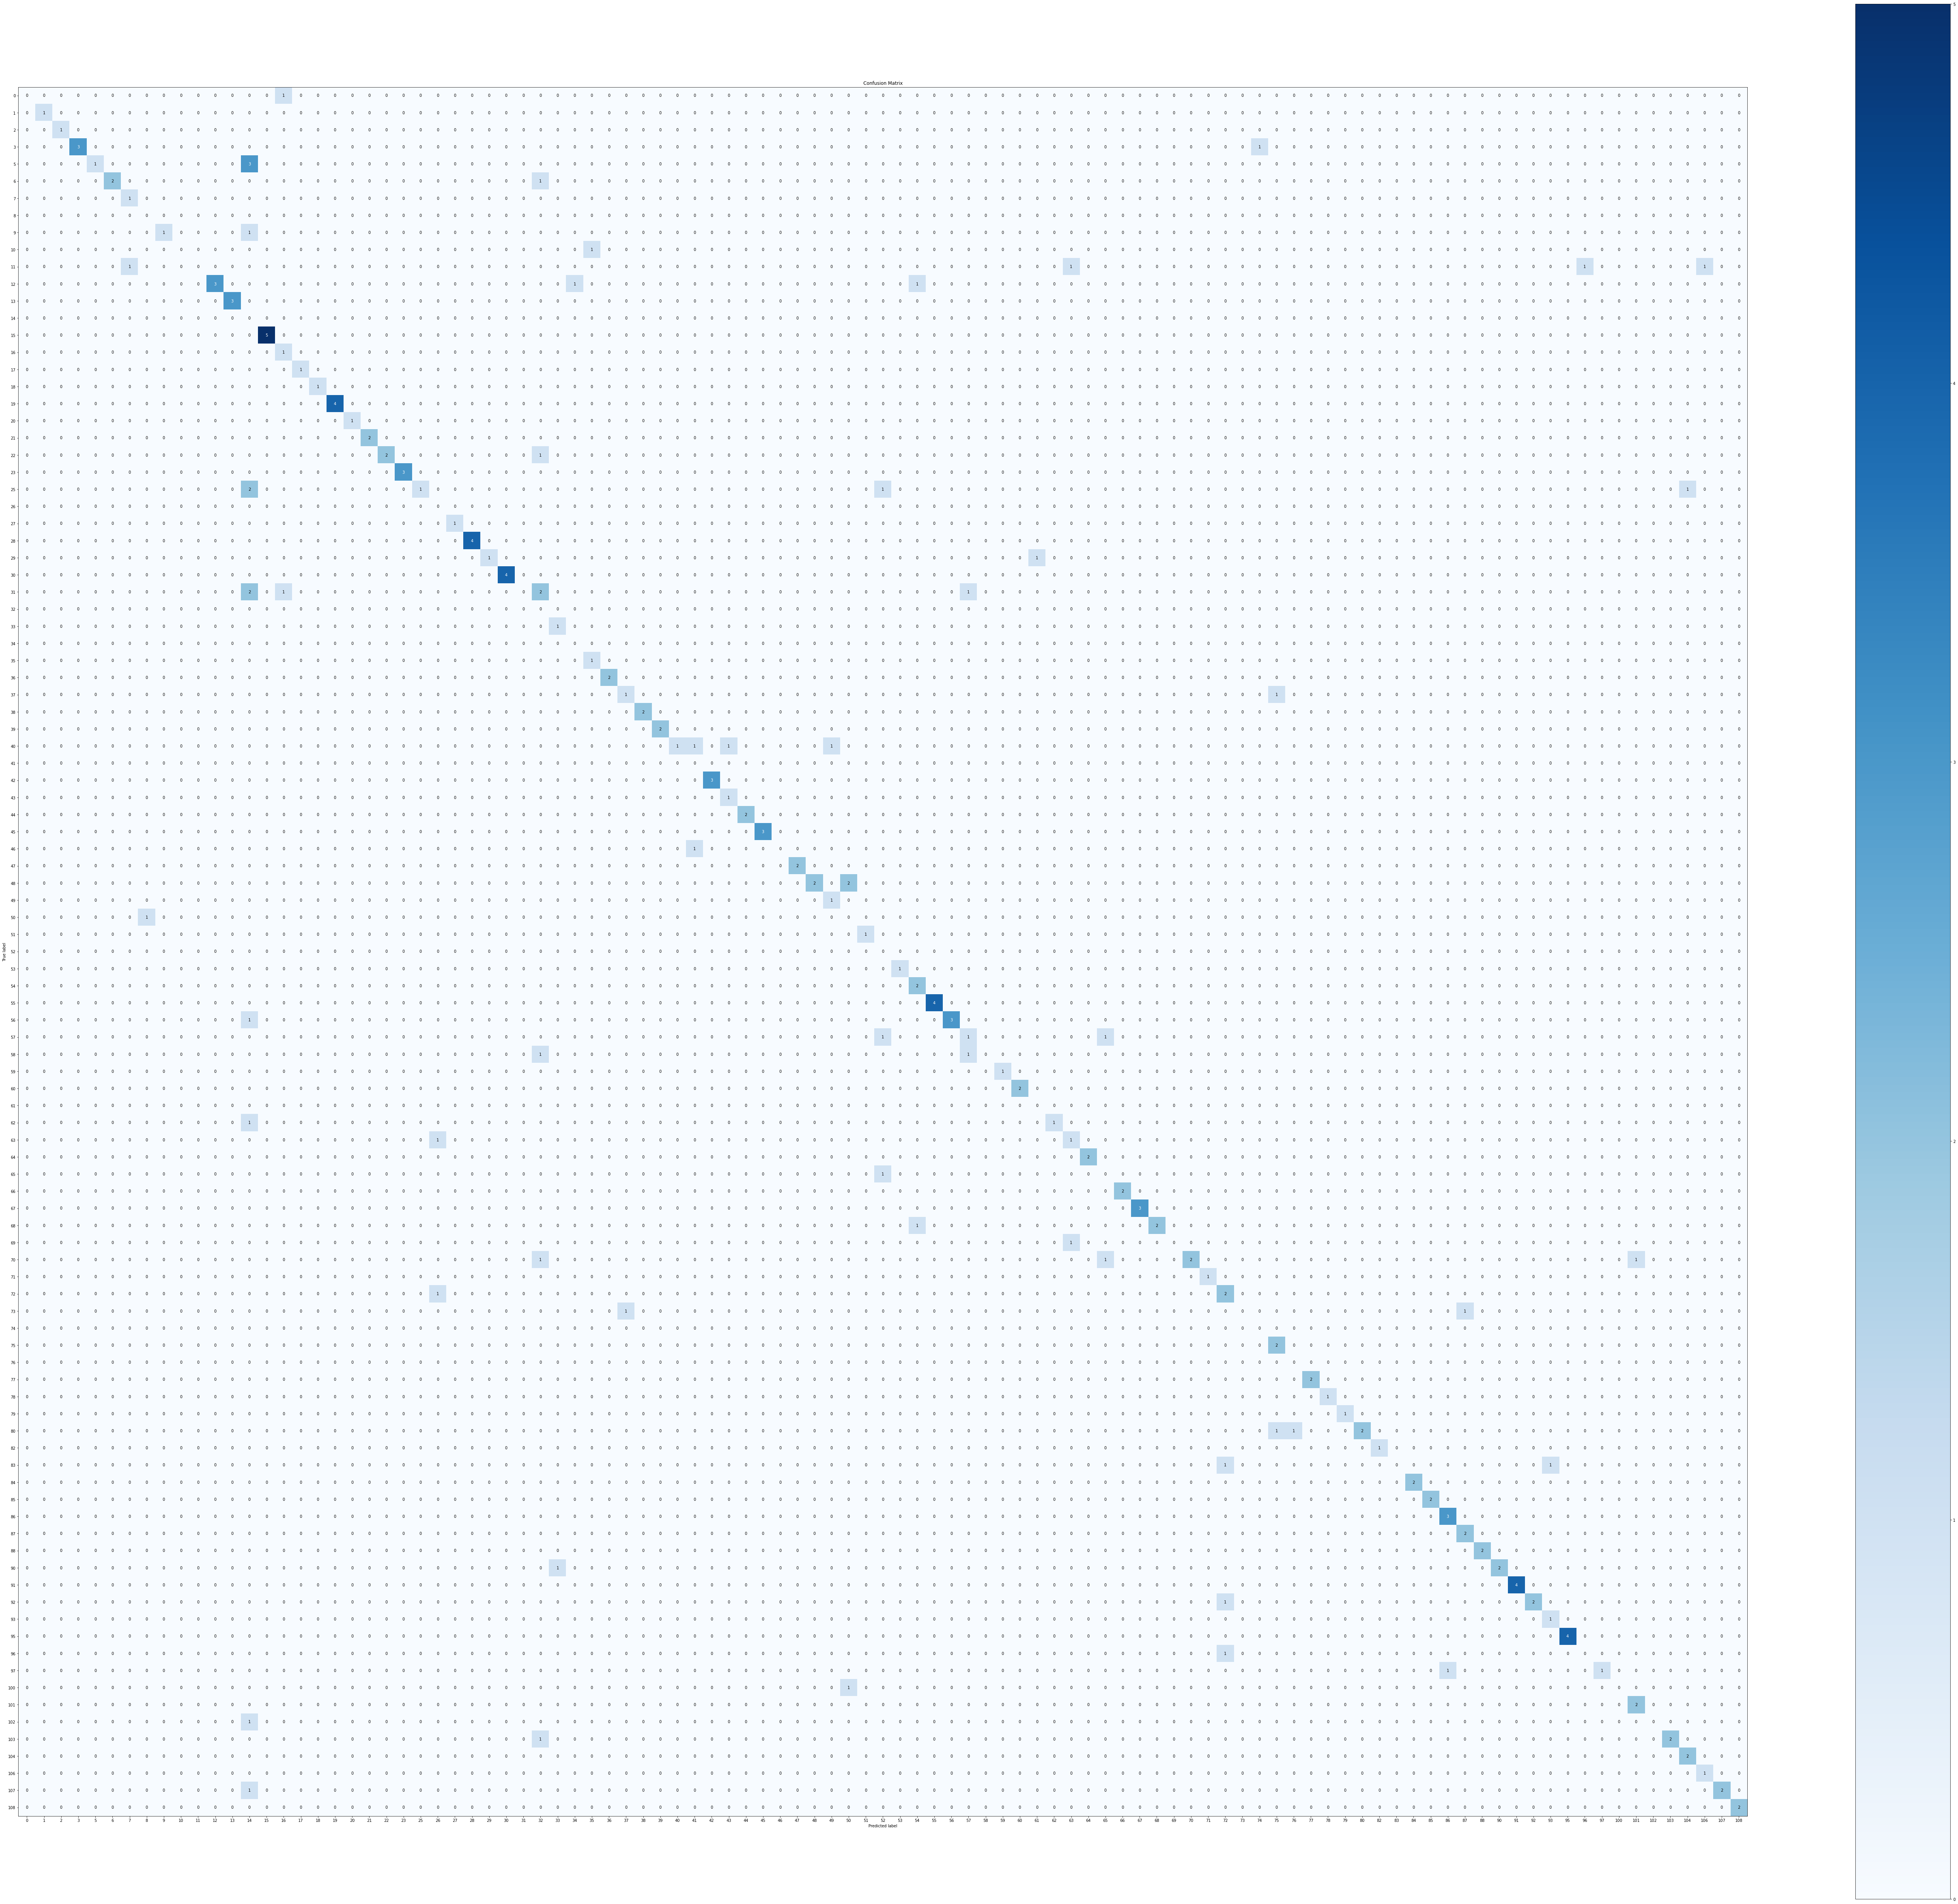

In [125]:
import scikitplot.metrics as splt

splt.plot_confusion_matrix(y_test, y_pred,figsize=(100,90))